# Lab02: Gradient Descent.

- Student ID: 18120647
- Student name: Lê Thanh Viễn

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle (**recommended compression format: zip**).

**Contents:**
- Gradient descent.

**Notes that**: this lab is prepared based on the book "Deep Learning for Computer Vision with Python" by Adrian Rosebrock.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [2]:
# generate a 2-class classification problem with 2,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
--> treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [3]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    return sigmoid_activation(x) * (1 - sigmoid_activation(x))


#### Compute output

In [4]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(X.dot(W))
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    preds = compute_h(W, X)

    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [5]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [6]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
   
    gradient = np.dot(trainX.T, error)
    gradient/=trainX.shape[0]
    return gradient

#### Training function 

In [7]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [8]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=401.1609838
Epoch=5, loss=234.1023068
Epoch=10, loss=92.9419129
Epoch=15, loss=44.0264973
Epoch=20, loss=25.2571434
Epoch=25, loss=16.4526240
Epoch=30, loss=11.6715483
Epoch=35, loss=8.7963174
Epoch=40, loss=6.9341150
Epoch=45, loss=5.6583087
Epoch=50, loss=4.7449379
Epoch=55, loss=4.0675462
Epoch=60, loss=3.5504482
Epoch=65, loss=3.1461299
Epoch=70, loss=2.8235486
Epoch=75, loss=2.5617238
Epoch=80, loss=2.3460565
Epoch=85, loss=2.1661274
Epoch=90, loss=2.0143337
Epoch=95, loss=1.8850172
Epoch=100, loss=1.7738936


#### Evaluate result

In [9]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**TODO: Study about accuracy, recall, precision, f1-score.**

Conceptual explanation:

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no.
- Accuracy: ratio between the number of points correctly classified and the total number of points
![Accuracy](https://i.ibb.co/X5SptJ0/B04223-10-02.jpg)
- Recall:the ratio of the number of true positive points among those points is actually positive 
![Recall](https://miro.medium.com/max/418/1*dXkDleGhA-jjZmZ1BlYKXg.png)
- Precision: the ratio of the number of true positive points among those classified as positive
![Precision](https://miro.medium.com/max/444/1*C3ctNdO0mde9fa1PFsCVqA.png)
- F1: harmonic mean of precision and recall 
![F1](https://miro.medium.com/max/282/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)

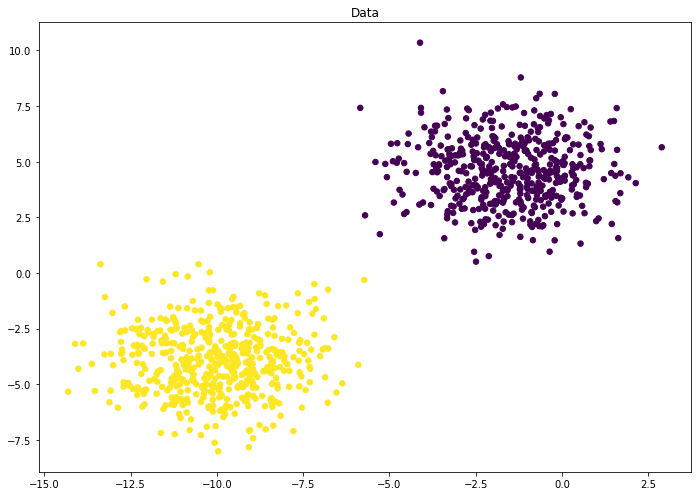

In [10]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

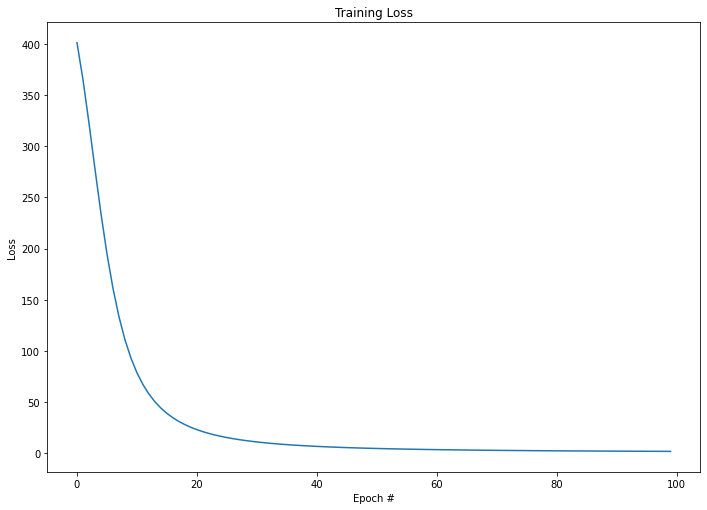

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observations**

#### Initialize

In [12]:
W = np.random.randn(X.shape[1], 1)
losses = []

####  learning_rate=0.1

In [13]:
num_epochs=100
learning_rate=0.1
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=441.0615902
Epoch=5, loss=5.6693978
Epoch=10, loss=2.8410239
Epoch=15, loss=2.3350240
Epoch=20, loss=2.1532254
Epoch=25, loss=2.0635850
Epoch=30, loss=2.0089313
Epoch=35, loss=1.9698813
Epoch=40, loss=1.9386170
Epoch=45, loss=1.9116324
Epoch=50, loss=1.8872416
Epoch=55, loss=1.8645921
Epoch=60, loss=1.8432351
Epoch=65, loss=1.8229251
Epoch=70, loss=1.8035204
Epoch=75, loss=1.7849345
Epoch=80, loss=1.7671091
Epoch=85, loss=1.7500010
Epoch=90, loss=1.7335746
Epoch=95, loss=1.7177987
Epoch=100, loss=1.7026442


####  Evaluate result

In [14]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



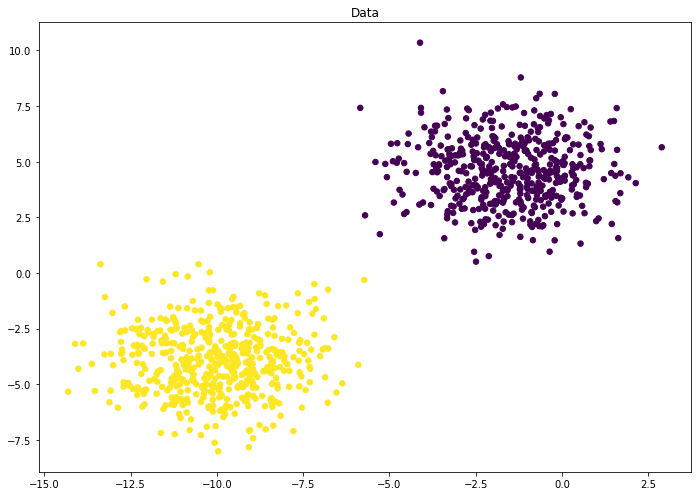

In [15]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

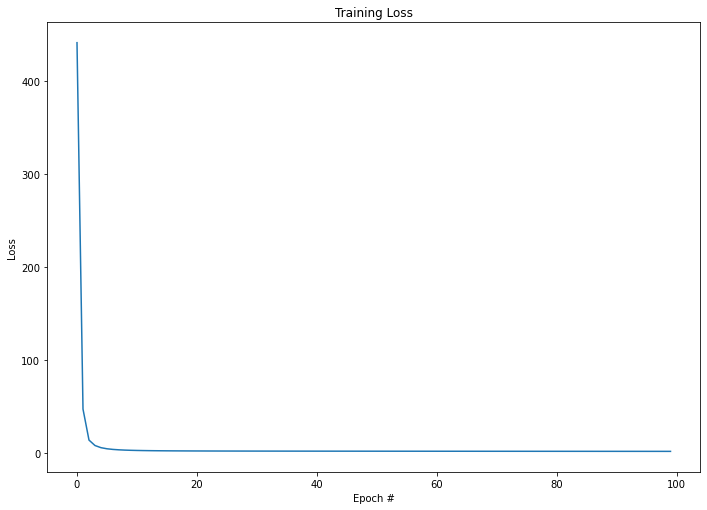

In [16]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### References

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/